Gradient Descent is one of the most commonly used algorithms in machine learning. I consider you already know how it works intuitively, so let's code it from scratch now.

**Batch Gradient Descent**: In this variant, the gradient is computed over the entire dataset, and the parameters are updated after each epoch.

### 1. Calculate Y
We'll need a method that calculates $y$ by applying the standart linear equation formula:
$$ y= b + wx $$

In [1]:
def calculate_single_feature_y(x: float, w: float, b: float) -> float:
    return b + w * x 

Let's upgrade the method to support vectors (multiple features) instead of single float values:
$$ y = b + \vec{w} \cdot \vec{x} $$

where the size of $ \vec{w}, \vec{x} $ is all the same ($n$).

$$ n - \text{number of features} $$
$$ m - \text{number of observations}$$

In [2]:
def calculate_multi_feature_y(x: list[float], w: list[float], b: float) -> list[float]:
    '''
    Calculate the predicted value for a single observation.

    Args:
        x -> list[float]    : list of features (x1, x2, ..., xn)
        w -> list[float]    : list of weights (w1, w2, ..., wn)
        b -> float          : bias

    Returns:
        y -> float          : predicted value for a single observation
    '''
    n = len(x) # Number of features
    y = b
    for k in range(n):
        y += w[k] * x[k] # y = w1*x1 + w2*x2 + ... + wn*xn + b
    return y

### 2. Calculate J (cost)
Now, we need to calculate the cost (the delta between predicted $\hat{y}$ and actual $y$).
$$ J = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)})^2 $$

In [3]:
def calculate_cost(X: list[list[float]], Y: list[list[float]], w: list[float], b: float) -> float:
    '''
    Calculate the cost by comparing the predicted and actual values for all observations.

    Args:
        X -> list[list[float]]  : m rows of n features (x^1, x^2, ..., x^m)
        Y -> list[list[float]]  : m rows of expected float values (y^1, y^2, ..., y^m)
        w -> list[float]        : n weights (w1, w2, ..., wn)
        b -> float              : bias

    Returns:
        cost -> float           : cost of the model
    '''
    m = len(Y) # Number of observations
    cost = 0
    for i in range(m): # For each observation
        y_pred_i = calculate_multi_feature_y(X[i], w, b) # Calculate the predicted value for the current observation
        cost += (y_pred_i - Y[i]) ** 2 # Calculate the squared difference between the predicted and actual values
    return cost / m # Normalize by the number of observations

### 3. Calculate dJ/dw and dJ/db (cost derivatives)
We need to calculate the derivative of $J$ - once w.r.t to $w$ and once w.r.t to $b$. This way we know how strongly a change in $w$ and $b$ impacts the cost.

$$ \frac{dJ}{dw_k} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) x^{(i)}_k  $$
$$ \frac{dJ}{db} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) $$

Where $i$ is the index of the observation and $k$ is the index of the feature. Note that for each feature ($n$ in total) we calculate a separate $\frac{dJ}{dw_k}$ derivative.

In [4]:
def calculate_dj_dw(X: list[list[float]], Y: list[list[float]], w: list[float], b: float) -> list[float]:
    '''
    Calculate the derivative of the cost function with respect to each weight.

    Args:
        X -> list[list[float]]  : m rows of n features (x^1, x^2, ..., x^m)
        Y -> list[list[float]]  : m rows of expected float values (y^1, y^2, ..., y^m)
        w -> list[float]        : n weights (w1, w2, ..., wn)
        b -> float              : bias

    Returns:
        dj_dw -> list[float]    : n weight derivatives (dj_dw1, dj_dw2, ..., dj_dwn)
    '''
    m = len(Y) # Number of observations
    n = len(w) # Number of features
    dj_dw = [0] * n # Initialize the derivative of the cost function with respect to the weights. n-sized list of zeros.

    for i in range(m): # For each observation
        y_pred_i = calculate_multi_feature_y(X[i], w, b) # Calculate the predicted value for the current observation
        cost_i = y_pred_i - Y[i] # Calculate the cost for the current observation
        for j in range(n): # For each feature
            dj_dw[j] += cost_i * X[i][j] # Calculate the derivative of the cost function with respect to the weights

    for k in range(n): # For each feature
        dj_dw[k] = 2/m * dj_dw[k] # Calculate the derivative of the cost function with respect to the weights

    return dj_dw

def calculate_dj_db(X: list[list[float]], Y: list[list[float]], w: list[float], b: float) -> float:
    '''
    Calculate the derivative of the cost function with respect to the bias.

    Args:
        X -> list[list[float]]  : m rows of n features (x^1, x^2, ..., x^m)
        Y -> list[list[float]]  : m rows of expected float values (y^1, y^2, ..., y^m)
        w -> list[float]        : n weights (w1, w2, ..., wn)
        b -> float              : bias

    Returns:
        dj_db -> float          : derivative of the cost function with respect to the bias
    '''
    m = len(Y) # Number of observations
    dj_db = 0 # Initialize the derivative of the cost function with respect to the bias

    for i in range(m): # For each observation
        y_pred_i = calculate_multi_feature_y(X[i], w, b) # Calculate the predicted value for the current observation
        cost_i = y_pred_i - Y[i] # Calculate the cost for the current observation
        dj_db += cost_i # Calculate the derivative of the cost function with respect to the bias

    return 2/m * dj_db

### 4. Gradient Descent
Once we know how each weight affects the cost we can slightly update these weights in the direction we want (up or down), based on the derivative result (negative or positive).

In [5]:
def gradient_descent(X: list[list[float]], Y: list[list[float]], w: list[float], b: float, learn_rate: float, num_iterations: int) -> tuple[list[float], float]:
    '''
    Perform gradient descent to find the optimal weights and bias.

    Args:
        X -> list[list[float]]  : m rows of n features (x^1, x^2, ..., x^m)
        Y -> list[list[float]]  : m rows of expected float values (y^1, y^2, ..., y^m)
        w -> list[float]        : n weights (w1, w2, ..., wn)
        b -> float              : bias
        learn_rate -> float     : learning rate
        num_iterations -> int   : number of iterations to perform

    Returns:
        w -> list[float]        : n weights (w1, w2, ..., wn)
        b -> float              : bias
    '''
    for iteration_number in range(num_iterations):
        dj_dw = calculate_dj_dw(X, Y, w, b) # Calculate the derivative of the cost function with respect to the weights
        dj_db = calculate_dj_db(X, Y, w, b) # Calculate the derivative of the cost function with respect to the bias

        # Update the weights and bias
        w = [w[j] - learn_rate * dj_dw[j] for j in range(len(w))]
        b = b - learn_rate * dj_db

        # Print the cost every 100 iterations
        if iteration_number % 100 == 0:
            print(f"Iteration {iteration_number}: Cost = {calculate_cost(X, Y, w, b)}")
    return w, b

### 5. Demo
Now let's do a simple demo - let's predict `salary` ($y$) by using `year of experience` ($x_1$) and `education level` ($x_2$).

Where the `education level` is represented by a number - *0:High school, 1:College, 2:Bachelor, 3:BSc (in DS/ML/AI), 4:Master, 5:MSc (in DS/ML/AI), 6:PhD, 7:PhD (in DS/ML/AI)*.

We will use the entire training set of 33 observations (as single **batch**) to compute the gradient at each iteration.

In [6]:
# X1 = years of experience
X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# X2 = level of education 
X2 = [2, 5, 3, 5, 3, 4, 2, 3, 4, 4, 3, 7, 5, 6, 5, 5, 2, 3, 4, 5, 6, 7, 5, 3, 2, 4, 5, 7, 3, 5, 7, 7, 5]
# Y = salary
Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]

In [7]:
# Merge the X1 and X2 into a single X
X = [[x1, x2] for x1, x2 in zip(X1, X2)]

# Configure gradient descent settings
b_init = 0          # initial bias (could be random as well)
w_init = [0, 0]     # initial weights (could be random as well)
learn_rate = 0.01   # learning rate (step size) - usually between 0.001 and 0.1
iterations = 5000   # number of iterations (epochs)

# Execute the gradient descent in search for optimal cost function (optimal `w` and `b`)
w, b = gradient_descent(X, Y, w_init, b_init, learn_rate, iterations)
print(f"Final `b` is {b} and `w` are {w}")

Iteration 0: Cost = 5328629.835213257
Iteration 100: Cost = 300737.89125791873
Iteration 200: Cost = 282619.8442161276
Iteration 300: Cost = 270706.79655683105
Iteration 400: Cost = 262873.6838484007
Iteration 500: Cost = 257723.2255897123
Iteration 600: Cost = 254336.6765558981
Iteration 700: Cost = 252109.93986910328
Iteration 800: Cost = 250645.80743729428
Iteration 900: Cost = 249683.10547500677
Iteration 1000: Cost = 249050.1059948663
Iteration 1100: Cost = 248633.89375311896
Iteration 1200: Cost = 248360.2242863733
Iteration 1300: Cost = 248180.2800908004
Iteration 1400: Cost = 248061.96249437472
Iteration 1500: Cost = 247984.16585537067
Iteration 1600: Cost = 247933.01271143247
Iteration 1700: Cost = 247899.37830038043
Iteration 1800: Cost = 247877.26287364878
Iteration 1900: Cost = 247862.72145359125
Iteration 2000: Cost = 247853.16012340033
Iteration 2100: Cost = 247846.8733209655
Iteration 2200: Cost = 247842.7395985582
Iteration 2300: Cost = 247840.02157757446
Iteration 2400

Let's visualize the results.

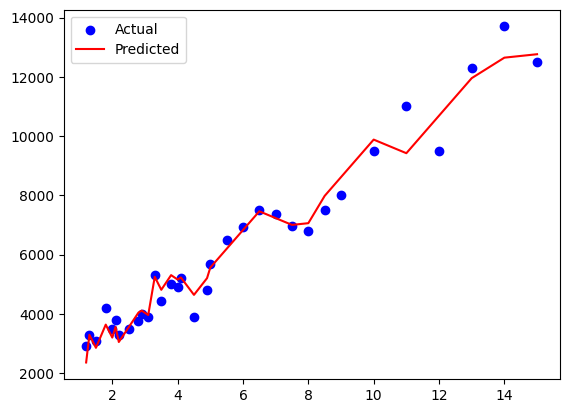

In [8]:
import matplotlib.pyplot as plt

Y_pred = []

for x1, x2 in zip(X1, X2):
    Y_pred.append(b + w[0] * x1 + w[1] * x2)

plt.scatter(X1, Y, color='blue', label='Actual')
plt.plot(X1, Y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

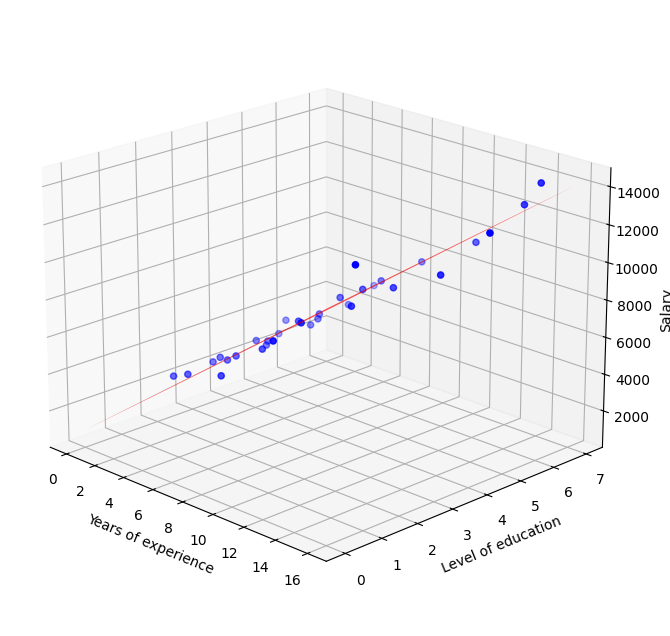

In [9]:
import numpy as np

#  Scatter the initial data points.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='blue', marker='o')
ax.set_xlabel('Years of experience')
ax.set_ylabel('Level of education')
ax.set_zlabel('Salary')

# Plot the linear function (it is a surface now), using the weights from the model.
yrs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
ed_level = [0,1,2,3,4,5,6,7]
yrs, ed_level = np.meshgrid(yrs, ed_level)
predicted_salary = np.array([b + w[0]*x1 + w[1]*x2 for x1, x2 in zip(np.ravel(yrs), np.ravel(ed_level))])
predicted_salary = predicted_salary.reshape(yrs.shape)
ax.plot_surface(yrs, ed_level, predicted_salary, color='red')
# Set the azimuth and elevation angles
ax.view_init(azim=-45, elev=20)
plt.show()